In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 

df = pd.read_csv('/content/drive/MyDrive/heart_disease_health_indicators_BRFSS2015(codestates).csv')
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Checkcare,Myocardialinfarction,HeartDisease,Depression,GreenVege,OrangeVege,Exercise,Asthma
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,2.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,4.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [3]:
df = df.drop(['HeartDisease','Myocardialinfarction'],axis='columns')

In [4]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Checkcare,Depression,GreenVege,OrangeVege,Exercise,Asthma
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,2.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,4.0,0.0,1.0,1.0,1.0,0.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,1.0,0.0,1.0,1.0,1.0,0.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,1.0,0.0,1.0,0.0,1.0,0.0


In [5]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Checkcare,Depression,GreenVege,OrangeVege,Exercise,Asthma
count,255041.000000,255041.000000,255041.000000,255041.000000,255041.000000,255041.000000,255041.000000,255041.000000,255041.000000,255041.000000,255041.000000,255041.000000,255041.000000,255041.000000,255041.000000,255041.000000,255041.000000,255041.000000,255041.000000,255041.000000,255041.000000,255041.000000,255041.000000,255041.000000,255041.000000,255041.000000,255041.000000,255041.000000
mean,0.093914,0.428135,0.422469,1.101195,28.371564,0.442815,0.040593,0.296305,0.756106,0.634027,0.810964,0.056222,0.950922,0.084135,2.511886,3.186401,4.246564,0.168345,0.440231,8.028062,5.049204,6.049890,1.349030,0.199368,0.563266,0.425041,0.756106,0.133810
std,0.291710,0.494809,0.493953,0.734985,6.609976,0.496720,0.197347,0.697617,0.429430,0.481703,0.391538,0.230351,0.216032,0.277591,1.069078,7.415785,8.726068,0.374174,0.496416,3.061926,0.986463,2.073091,0.791222,0.399526,0.495982,0.494350,0.429430,0.340449
min,0.000000,0.000000,0.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,9.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Checkcare               0
Depression              0
GreenVege               0
OrangeVege              0
Exercise                0
Asthma                  0
dtype: int64

In [7]:
df.shape

(255041, 28)

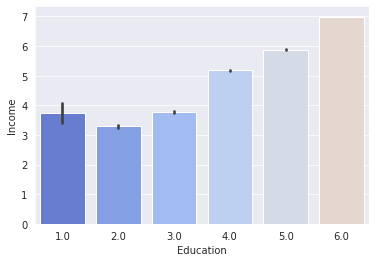

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
palette = sns.color_palette('coolwarm', 10)
sns.barplot(x = df['Education'], y = df['Income'], palette=palette)

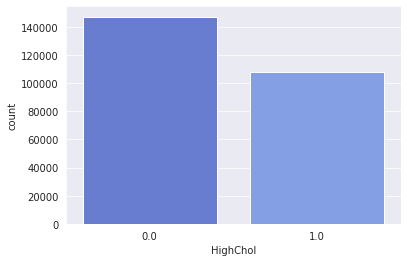

In [ ]:
sns.set_style("darkgrid")
sns.countplot(x=df['HighChol'],palette=palette)

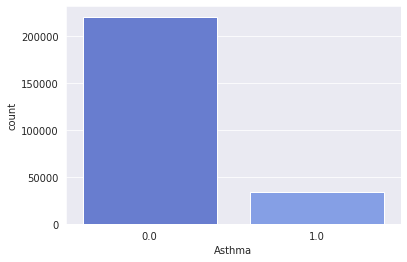

In [ ]:
sns.set_style("darkgrid")
sns.countplot(x=df['Asthma'],palette=palette)

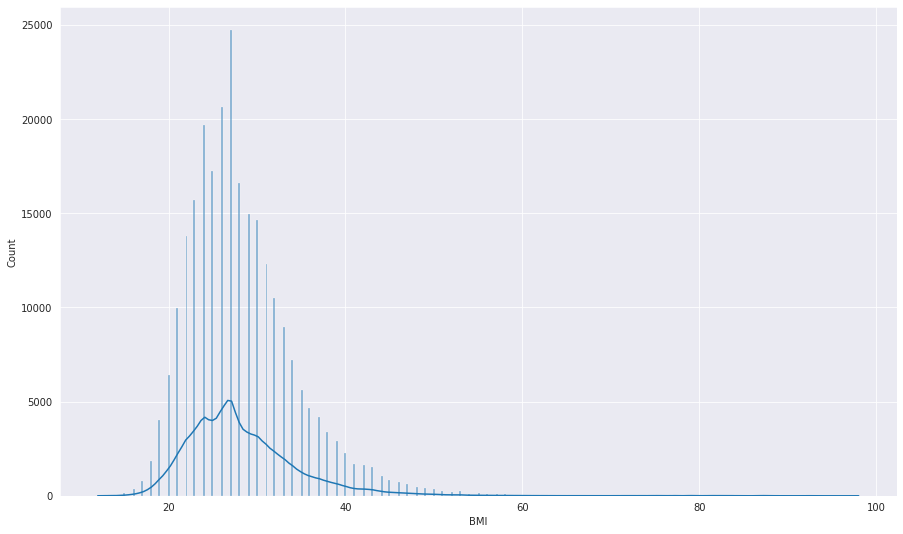

In [ ]:
plt.figure(figsize=(15, 9))
sns.set_style("darkgrid")
sns.histplot(x=df['BMI'],kde=True)

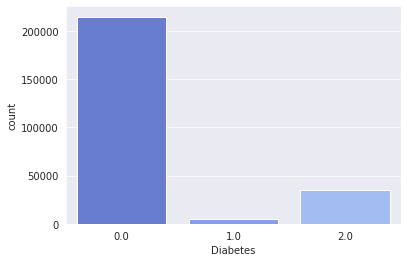

In [ ]:
sns.set_style("darkgrid")
sns.countplot(x=df['Diabetes'],palette=palette)

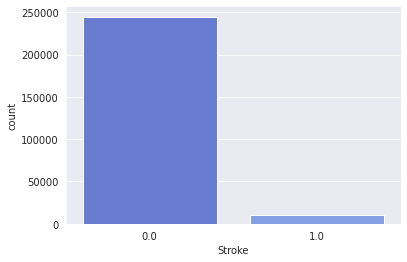

In [ ]:
sns.set_style("darkgrid")
sns.countplot(x=df['Stroke'],palette=palette)

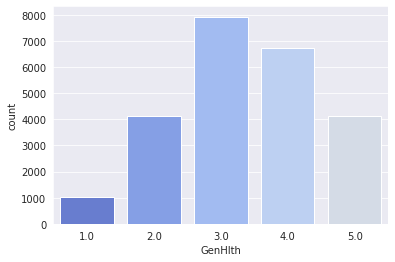

In [ ]:
# 각 특성마다의 심장마비 횟수
diverging_colors = sns.color_palette("RdBu", 10)

delay = df[df.HeartDiseaseorAttack == 1]
delay.shape
sns.countplot(delay['GenHlth'],palette=palette);


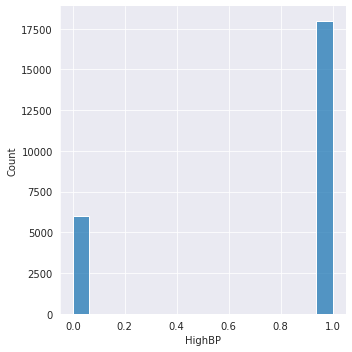

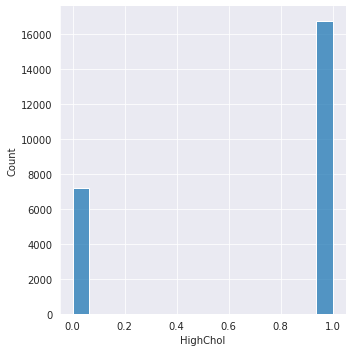

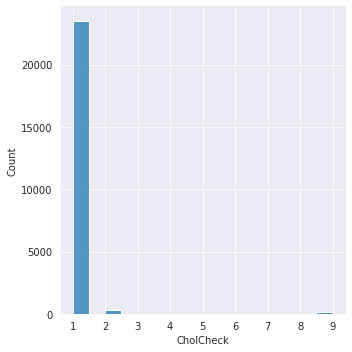

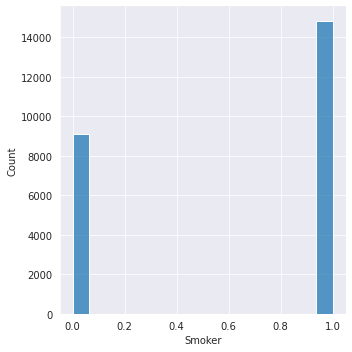

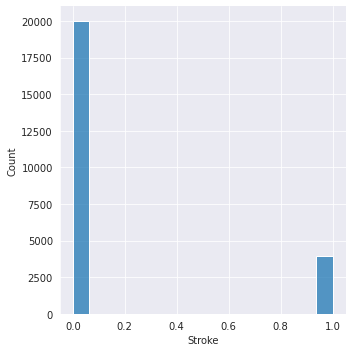

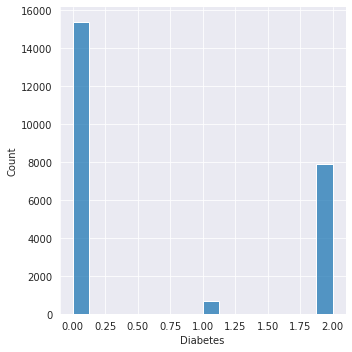

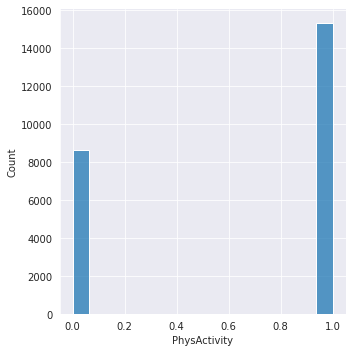

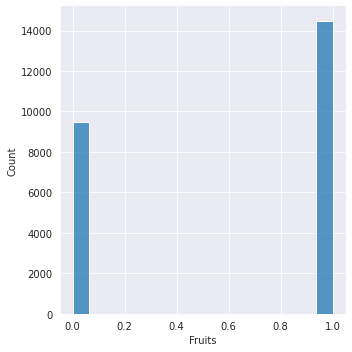

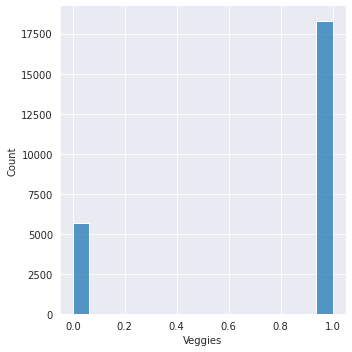

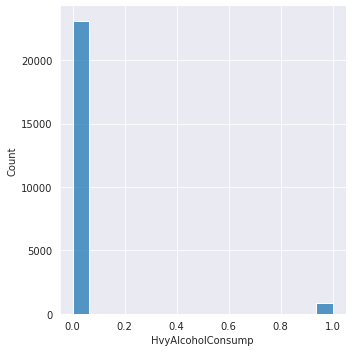

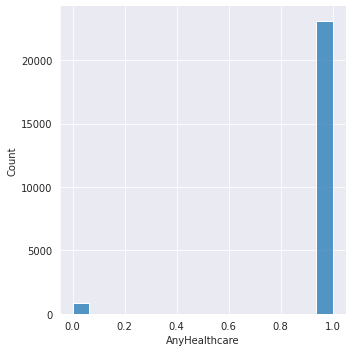

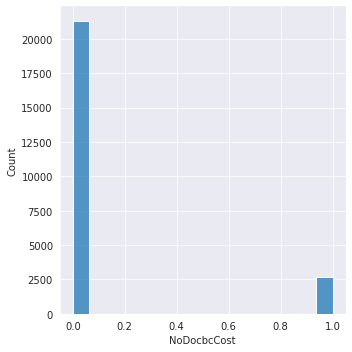

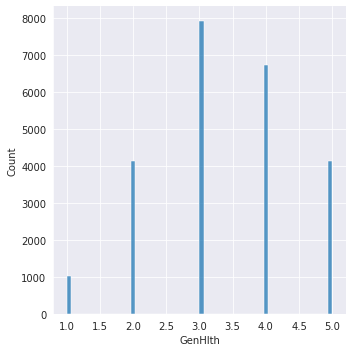

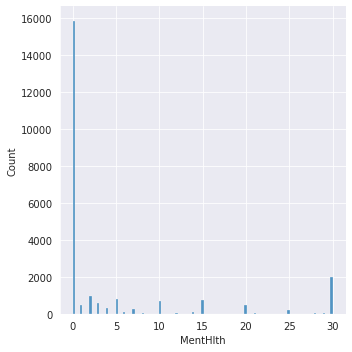

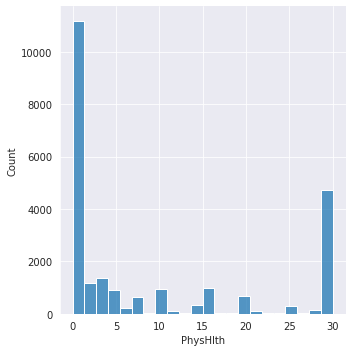

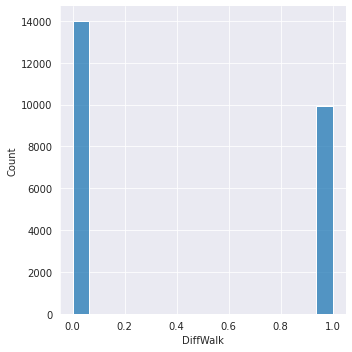

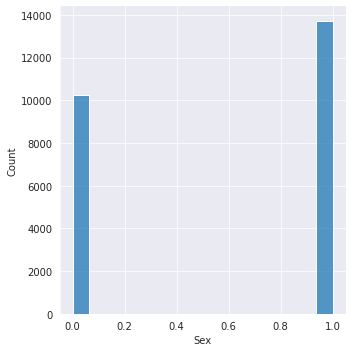

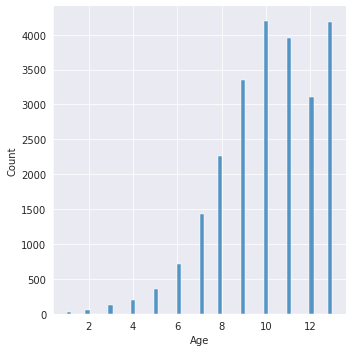

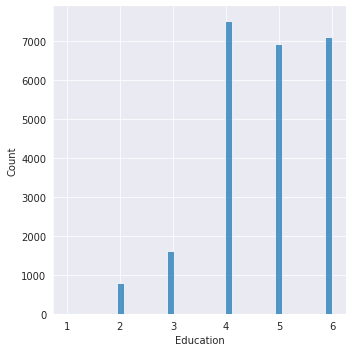

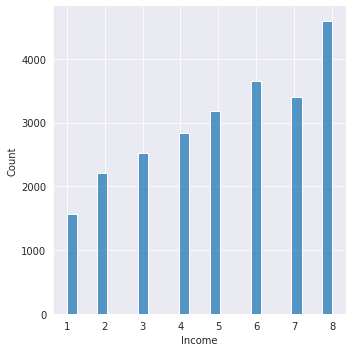

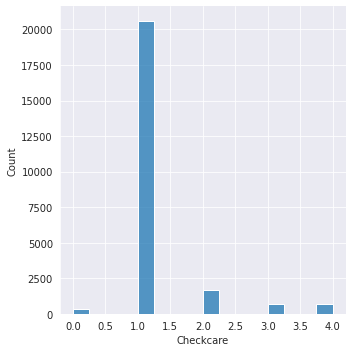

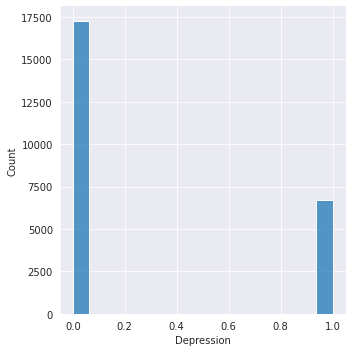

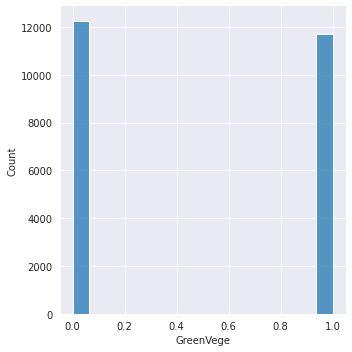

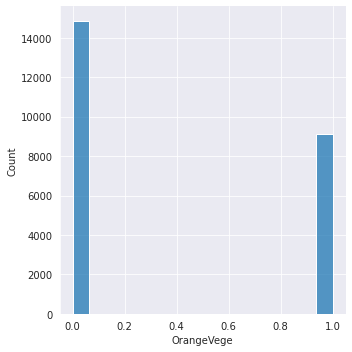

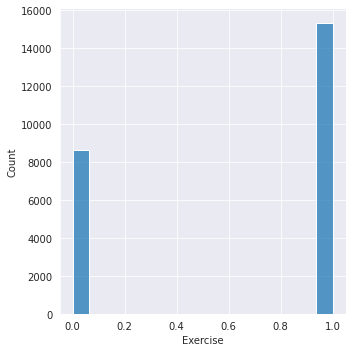

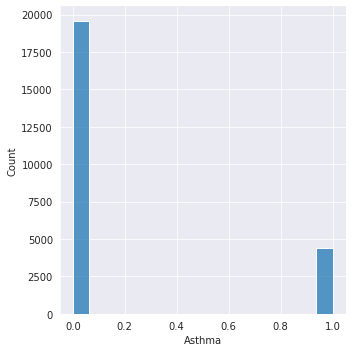

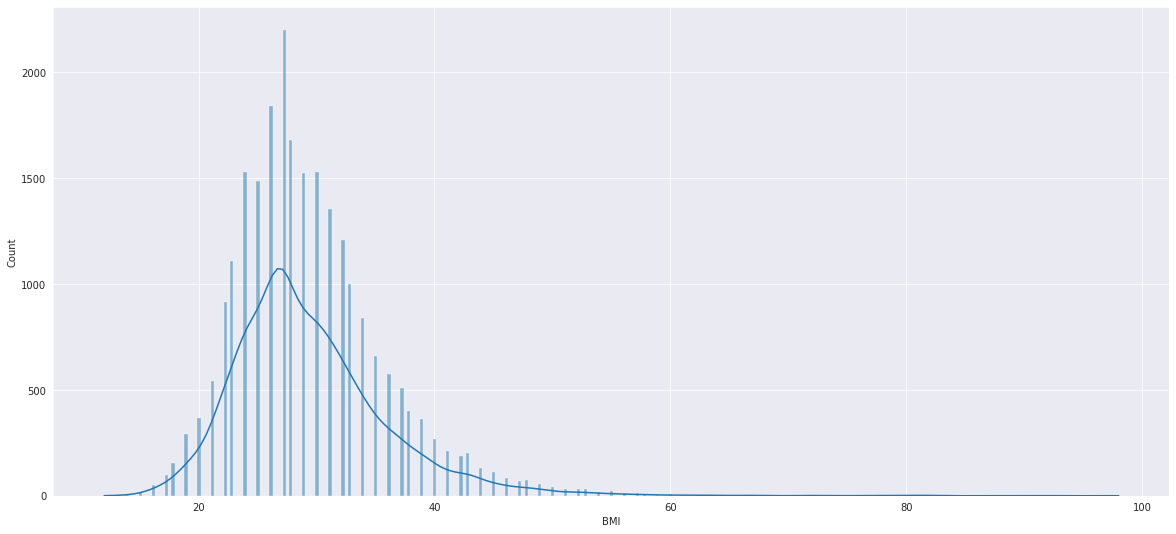

In [ ]:
# 각 특성마다의 심장마비 횟수
features = df.drop(columns=['BMI','HeartDiseaseorAttack']).columns

delay = df[df.HeartDiseaseorAttack == 1]
delay.shape
dp = features
for i in dp:
    sns.displot(delay[i]);
plt.figure(figsize=(20, 9))
sns.histplot(delay['BMI'],shrink=.5,kde=True,)

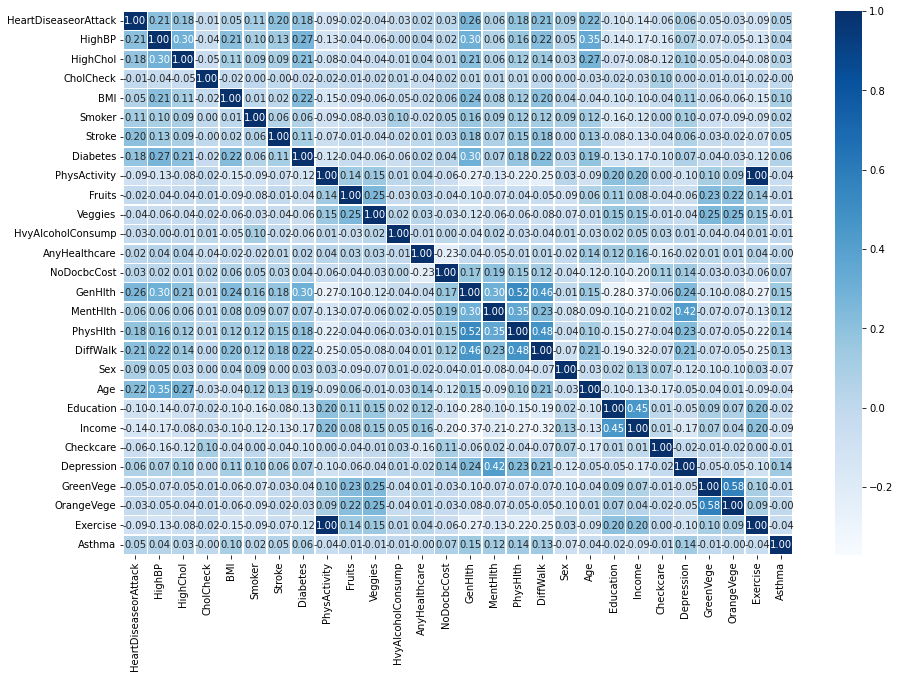

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues');

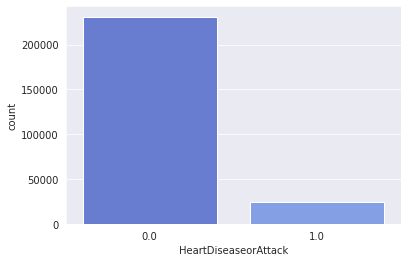

In [9]:
sns.set_style("darkgrid")
sns.countplot(x=df['HeartDiseaseorAttack'],palette=palette)

In [10]:
df['HeartDiseaseorAttack'].value_counts()

0.0    231089
1.0     23952
Name: HeartDiseaseorAttack, dtype: int64

In [11]:
df['HeartDiseaseorAttack'].value_counts(normalize=True)

0.0    0.906086
1.0    0.093914
Name: HeartDiseaseorAttack, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=0.70, test_size=0.30, random_state=2)


train.shape, test.shape

((178528, 28), (76513, 28))

In [13]:
target = 'HeartDiseaseorAttack'
features = train.drop(columns=[target]).columns

In [14]:
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [15]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# 모델설정
sm = SMOTE(ratio='auto', kind='regular')

# train데이터를 넣어 복제함
X_resampled, y_resampled = sm.fit_sample(X_train,list(y_train))

print('After OverSampling, the shape of train_X: {}'.format(X_resampled.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(X_resampled.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_resampled==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_resampled==0)))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (323440, 27)
After OverSampling, the shape of train_y: (323440, 27) 

After OverSampling, counts of label '1': 161720
After OverSampling, counts of label '0': 161720


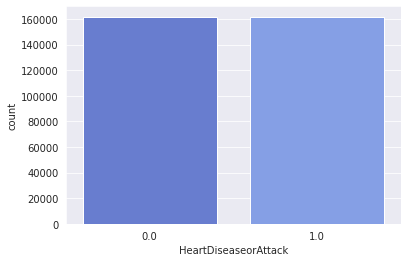

In [29]:
sns.set_style("darkgrid")
sns.countplot(x=y_resampled['HeartDiseaseorAttack'],palette=palette)

In [16]:
X_resampled

array([[1.        , 0.        , 1.        , ..., 1.        , 1.        ,
        0.        ],
       [1.        , 0.        , 1.        , ..., 1.        , 1.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.83657162],
       [1.        , 1.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.88685207, 1.        ,
        0.        ]])

In [17]:
X_resampled = pd.DataFrame(X_resampled, columns=features)

In [18]:
y_resampled = pd.DataFrame(y_resampled)

In [19]:
y_resampled.columns = ['HeartDiseaseorAttack']

In [20]:
X_resampled

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Checkcare,Depression,GreenVege,OrangeVege,Exercise,Asthma
0,1.0,0.000000,1.0,22.000000,1.000000,0.000000,0.0,1.0,1.000000,1.000000,0.0,1.0,0.0,4.000000,0.000000,2.000000,0.0,0.0,13.000000,5.000000,7.000000,1.00000,0.0,1.000000,1.000000,1.0,0.000000
1,1.0,0.000000,1.0,31.000000,0.000000,0.000000,0.0,1.0,1.000000,1.000000,0.0,1.0,0.0,3.000000,0.000000,2.000000,1.0,0.0,11.000000,6.000000,6.000000,1.00000,0.0,1.000000,1.000000,1.0,0.000000
2,1.0,1.000000,1.0,26.000000,1.000000,0.000000,0.0,1.0,1.000000,1.000000,0.0,1.0,0.0,2.000000,5.000000,15.000000,0.0,1.0,5.000000,3.000000,4.000000,1.00000,1.0,0.000000,0.000000,1.0,0.000000
3,1.0,1.000000,1.0,35.000000,1.000000,0.000000,0.0,1.0,1.000000,1.000000,0.0,1.0,0.0,2.000000,0.000000,30.000000,1.0,1.0,9.000000,4.000000,5.000000,1.00000,0.0,1.000000,0.000000,1.0,0.000000
4,1.0,0.000000,1.0,23.000000,1.000000,0.000000,0.0,1.0,1.000000,1.000000,1.0,1.0,0.0,2.000000,1.000000,0.000000,0.0,0.0,9.000000,5.000000,2.000000,1.00000,1.0,1.000000,1.000000,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323435,1.0,1.000000,1.0,28.000000,0.000000,0.503820,2.0,0.0,1.000000,0.496180,0.0,1.0,0.0,4.000000,0.503820,0.503820,1.0,0.0,12.503820,3.503820,2.496180,1.49618,0.0,0.000000,0.000000,0.0,0.000000
323436,0.0,0.809532,1.0,22.000000,0.190468,0.000000,0.0,1.0,1.000000,0.809532,0.0,1.0,0.0,4.000000,30.000000,28.380937,1.0,0.0,12.000000,6.000000,7.000000,1.00000,1.0,0.809532,0.809532,1.0,1.000000
323437,1.0,1.000000,1.0,37.000000,0.000000,0.000000,2.0,1.0,0.163428,1.000000,0.0,1.0,0.0,3.000000,1.673143,0.000000,0.0,0.0,8.000000,5.163428,7.836572,1.00000,0.0,1.000000,1.000000,1.0,0.836572
323438,1.0,1.000000,1.0,22.953621,0.000000,0.953621,0.0,1.0,1.000000,1.000000,0.0,1.0,0.0,2.953621,0.000000,0.000000,0.0,0.0,13.000000,5.953621,3.046379,1.00000,0.0,1.000000,0.000000,1.0,0.000000


In [21]:
from sklearn.model_selection import train_test_split


X_train_undersample, X_val_undersample, y_train_undersample, y_val_undersample = train_test_split(X_resampled,
                                                                                                    y_resampled,
                                                                                                    test_size = 0.3,
                                                                                                    random_state = 2)

In [22]:
X_train_undersample

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Checkcare,Depression,GreenVege,OrangeVege,Exercise,Asthma
157610,0.0,0.000000,1.0,20.000000,1.0,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,1.000000,2.000000,0.0,0.000000,0.000000,0.0,4.000000,4.000000,8.000000,1.0,1.0,0.000000,0.000000,1.0,0.0
112762,1.0,1.000000,1.0,35.000000,0.0,0.000000,0.0,1.0,1.0,1.0,0.0,1.0,0.000000,2.000000,0.0,0.000000,0.000000,1.0,9.000000,6.000000,8.000000,1.0,0.0,1.000000,1.000000,1.0,0.0
78938,1.0,0.000000,1.0,18.000000,0.0,0.000000,0.0,1.0,1.0,1.0,0.0,1.0,0.000000,3.000000,0.0,0.000000,0.000000,0.0,9.000000,5.000000,7.000000,1.0,0.0,1.000000,1.000000,1.0,1.0
126056,1.0,0.000000,1.0,42.000000,0.0,0.000000,2.0,1.0,1.0,1.0,0.0,1.0,1.000000,3.000000,0.0,0.000000,0.000000,0.0,8.000000,6.000000,8.000000,1.0,1.0,1.000000,1.000000,1.0,0.0
316852,1.0,0.232298,1.0,22.000000,1.0,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.767702,3.767702,0.0,0.232298,0.767702,1.0,9.232298,4.232298,7.232298,1.0,0.0,0.000000,0.000000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33867,0.0,0.000000,1.0,31.000000,0.0,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,1.000000,0.0,7.000000,0.000000,1.0,2.000000,6.000000,2.000000,4.0,0.0,1.000000,0.000000,1.0,0.0
84434,1.0,0.000000,1.0,27.000000,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,2.000000,0.0,0.000000,0.000000,1.0,11.000000,4.000000,4.000000,4.0,0.0,0.000000,0.000000,1.0,0.0
95816,0.0,0.000000,1.0,17.000000,0.0,0.000000,0.0,1.0,1.0,1.0,0.0,1.0,0.000000,3.000000,2.0,14.000000,1.000000,0.0,6.000000,5.000000,4.000000,1.0,1.0,0.000000,1.000000,1.0,0.0
203245,0.0,0.288486,1.0,24.288486,1.0,0.288486,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,4.000000,30.0,30.000000,1.000000,0.0,7.288486,5.288486,1.288486,1.0,1.0,0.288486,0.288486,0.0,1.0


In [23]:
print("학습 데이터의 거래 건수(under sampled): ", len(X_train_undersample))
print("테스트 데이터의 거래 건수(under sampled): ", len(X_val_undersample))
print("전체 거래 건수(under sampled): ", len(X_train_undersample)+len(X_val_undersample))

학습 데이터의 거래 건수(under sampled):  226408
테스트 데이터의 거래 건수(under sampled):  97032
전체 거래 건수(under sampled):  323440


In [24]:
!pip install --upgrade category_encoders

     |████████████████████████████████| 82 kB 381 kB/s 


In [25]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestClassifier

processor = make_pipeline(TargetEncoder(min_samples_leaf = 2))

X_train_processed = processor.fit_transform(X_train_undersample,y_train_undersample)
X_val_processed = processor.transform(X_val_undersample)

eval_set = [(X_train_processed, y_train_undersample), 
            (X_val_processed, y_val_undersample)]

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
'''
make_pipeline(
    TargetEncoder(), 
    SimpleImputer(strategy='median')
)
'''

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint, uniform

In [28]:
dists = {   
    'randomforestclassifier__n_estimators': randint(700, 1000), 
    'randomforestclassifier__max_depth': [5,10,15, None], 
    'randomforestclassifier__max_features': uniform(0, 1) # max_features
}

model0 = XGBClassifier()

clf = RandomizedSearchCV(
    model0, 
    param_distributions=dists, 
    n_iter=10,
    scoring='f1',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train_processed, y_train_undersample);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 12.7min finished
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
print('검증 정확도', clf.score(X_val_processed, y_val_undersample))

검증 정확도 0.9353423612435627


In [31]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('f1: ', clf.best_score_)

최적 하이퍼파라미터:  {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': 0.8041587983097975, 'randomforestclassifier__n_estimators': 728}
f1:  0.934539189162473


In [32]:
model0 = clf.best_estimator_

In [55]:
print('검증 정확도', model0.score(X_val_processed, y_val_undersample))

검증 정확도 0.9371135295572595


In [56]:
from sklearn.metrics import roc_auc_score
class_index = 1
y_pred_probav = model0.predict_proba(X_val_processed)[:, class_index]
print(f'Test AUC for class "{model0.classes_[class_index]}":')
print(roc_auc_score(y_val_undersample, y_pred_probav)) # 범위는 0-1, 수치는 높을 수록 좋습니다

Test AUC for class "1.0":
0.9815397946901492


In [57]:
from sklearn.metrics import classification_report
y_val_pred = model0.predict(X_val_processed)
print(classification_report(y_val_undersample, y_val_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94     48523
         1.0       0.96      0.91      0.94     48509

    accuracy                           0.94     97032
   macro avg       0.94      0.94      0.94     97032
weighted avg       0.94      0.94      0.94     97032



In [58]:
# roc_curve(타겟값, prob of 1)
fpr, tpr, thresholds = roc_curve(y_val_undersample, y_pred_probav)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPRate(Recall)': tpr, 
    'Threshold': thresholds
})
roc

,FPR(Fall-out),TPRate(Recall),Threshold
0,0.000000,0.000000,1.999977
1,0.000000,0.000021,0.999977
2,0.000000,0.000041,0.999977
3,0.000000,0.000082,0.999966
4,0.000000,0.000247,0.999888
...,...,...,...
26759,0.997774,1.000000,0.005629
26760,0.997815,1.000000,0.005624
26761,0.999835,1.000000,0.004210
26762,0.999876,1.000000,0.004193


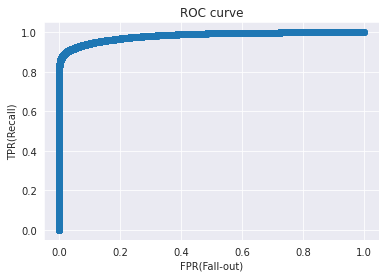

In [59]:
import matplotlib.pyplot as plt
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)');

In [60]:
import numpy as np

# threshold 최대값의 인덱스, np.argmax()


optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('idx:', optimal_idx, ', threshold:', optimal_threshold)

idx: 15486 , threshold: 0.5234476


In [61]:
y_pred_optimalv = y_pred_probav >= optimal_threshold
print(classification_report(y_val_undersample, y_pred_optimalv))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94     48523
         1.0       0.97      0.91      0.94     48509

    accuracy                           0.94     97032
   macro avg       0.94      0.94      0.94     97032
weighted avg       0.94      0.94      0.94     97032



In [62]:
auc_score = roc_auc_score(y_val_undersample, y_pred_optimalv)
auc_score

0.9380466123847084

# TEST **분석**

In [33]:
from sklearn.metrics import roc_auc_score
X_test_processed = processor.transform(X_test)
class_index = 1
y_pred_proba = model0.predict_proba(X_test_processed)[:, class_index]
print(f'Test AUC for class "{model0.classes_[class_index]}":')
print(roc_auc_score(y_test, y_pred_proba)) # 범위는 0-1, 수치는 높을 수록 좋습니다

Test AUC for class "1.0":
0.8384877696190732


In [34]:
from sklearn.metrics import classification_report
y_test_pred = model0.predict(X_test_processed)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95     69369
         1.0       0.43      0.26      0.32      7144

    accuracy                           0.90     76513
   macro avg       0.68      0.61      0.63     76513
weighted avg       0.88      0.90      0.89     76513



In [35]:
from sklearn.metrics import roc_curve

# roc_curve(타겟값, prob of 1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPRate(Recall)': tpr, 
    'Threshold': thresholds
})
roc

,FPR(Fall-out),TPRate(Recall),Threshold
0,0.000000,0.00000,1.849599
1,0.000000,0.00014,0.849599
2,0.000000,0.00028,0.849277
3,0.000014,0.00028,0.844394
4,0.000014,0.00042,0.841092
...,...,...,...
17837,0.997722,1.00000,0.005647
17838,0.997751,1.00000,0.005646
17839,0.998616,1.00000,0.005259
17840,0.998659,1.00000,0.005255


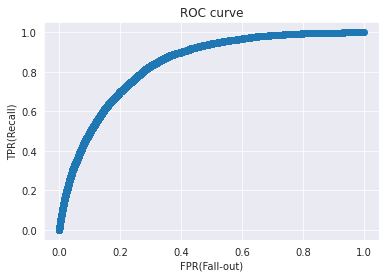

In [36]:
import matplotlib.pyplot as plt
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)');

In [37]:
import numpy as np

# threshold 최대값의 인덱스, np.argmax()


optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('idx:', optimal_idx, ', threshold:', optimal_threshold)

idx: 9667 , threshold: 0.1539819


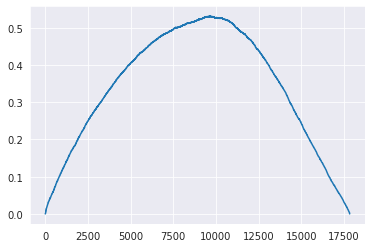

In [38]:
plt.plot(tpr-fpr);

In [39]:
y_pred_optimal = y_pred_proba >= optimal_threshold
print(classification_report(y_test, y_pred_optimal))

              precision    recall  f1-score   support

         0.0       0.98      0.71      0.82     69369
         1.0       0.22      0.82      0.35      7144

    accuracy                           0.72     76513
   macro avg       0.60      0.77      0.59     76513
weighted avg       0.90      0.72      0.78     76513



In [40]:
auc_score = roc_auc_score(y_test, y_pred_optimal)
auc_score

0.765448662149964

In [73]:
dists = {   
    'xgbclassifier__n_estimators': randint(500, 1000), 
    'xgbclassifier__max_depth': [7,10,15, None], 
    'xgbclassifier__max_features': uniform(0, 1) # max_features
}

model1 = XGBClassifier()

clf1 = RandomizedSearchCV(
    model1, 
    param_distributions=dists, 
    n_iter=10,
    scoring='f1',  
    verbose=1,
    n_jobs=-1
)

clf1.fit(X_train_processed, y_train_undersample, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=10);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 19.6min finished
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-auc:0.862859	validation_1-auc:0.862133
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.881382	validation_1-auc:0.880482
[2]	validation_0-auc:0.892378	validation_1-auc:0.891892
[3]	validation_0-auc:0.902724	validation_1-auc:0.902249
[4]	validation_0-auc:0.909984	validation_1-auc:0.909417
[5]	validation_0-auc:0.914756	validation_1-auc:0.914169
[6]	validation_0-auc:0.921477	validation_1-auc:0.921016
[7]	validation_0-auc:0.926199	validation_1-auc:0.925946
[8]	validation_0-auc:0.929804	validation_1-auc:0.92953
[9]	validation_0-auc:0.934976	validation_1-auc:0.934893
[10]	validation_0-auc:0.937362	validation_1-auc:0.937292
[11]	validation_0-auc:0.938681	validation_1-auc:0.938524
[12]	validation_0-auc:0.941123	validation_1-auc:0.940963
[13]	validation_0-auc:0.943152	validation_1-auc:0.942959
[14]	validation_0-auc:0.944619	validation_1-auc:0.944326

In [75]:
print('최적 하이퍼파라미터: ', clf1.best_params_)
print('f1: ', clf1.best_score_)

최적 하이퍼파라미터:  {'xgbclassifier__max_depth': 15, 'xgbclassifier__max_features': 0.4560817693096826, 'xgbclassifier__n_estimators': 922}
f1:  0.934539189162473


In [76]:
model2 = clf1.best_estimator_

In [77]:
print('검증 정확도', model2.score(X_val_processed, y_val_undersample))

검증 정확도 0.9371135295572595


In [78]:
from sklearn.metrics import roc_auc_score
class_index = 1
y_pred_probavv = model2.predict_proba(X_val_processed)[:, class_index]
print(f'Test AUC for class "{model2.classes_[class_index]}":')
print(roc_auc_score(y_val_undersample, y_pred_probavv)) # 범위는 0-1, 수치는 높을 수록 좋습니다

Test AUC for class "1.0":
0.9815397946901492


In [80]:
from sklearn.metrics import classification_report
y_val_predv = model2.predict(X_val_processed)
print(classification_report(y_val_undersample, y_val_predv))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94     48523
         1.0       0.96      0.91      0.94     48509

    accuracy                           0.94     97032
   macro avg       0.94      0.94      0.94     97032
weighted avg       0.94      0.94      0.94     97032



# **TEST 분석**

In [81]:
from sklearn.metrics import roc_auc_score
X_test_processed = processor.transform(X_test)
class_index = 1
y_pred_proba = model2.predict_proba(X_test_processed)[:, class_index]
print(f'Test AUC for class "{model2.classes_[class_index]}":')
print(roc_auc_score(y_test, y_pred_proba)) # 범위는 0-1, 수치는 높을 수록 좋습니다

Test AUC for class "1.0":
0.8384877696190732


In [82]:
from sklearn.metrics import classification_report
y_test_pred = model2.predict(X_test_processed)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95     69369
         1.0       0.43      0.26      0.32      7144

    accuracy                           0.90     76513
   macro avg       0.68      0.61      0.63     76513
weighted avg       0.88      0.90      0.89     76513



In [83]:
from sklearn.metrics import roc_curve
# roc_curve(타겟값, prob of 1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPRate(Recall)': tpr, 
    'Threshold': thresholds
})
roc

,FPR(Fall-out),TPRate(Recall),Threshold
0,0.000000,0.00000,1.849599
1,0.000000,0.00014,0.849599
2,0.000000,0.00028,0.849277
3,0.000014,0.00028,0.844394
4,0.000014,0.00042,0.841092
...,...,...,...
17837,0.997722,1.00000,0.005647
17838,0.997751,1.00000,0.005646
17839,0.998616,1.00000,0.005259
17840,0.998659,1.00000,0.005255


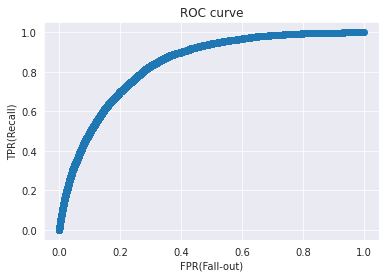

In [84]:
import matplotlib.pyplot as plt
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)');

In [85]:
import numpy as np
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('idx:', optimal_idx, ', threshold:', optimal_threshold)

idx: 9667 , threshold: 0.1539819


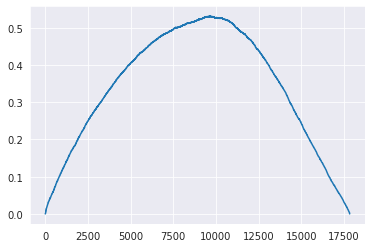

In [86]:
plt.plot(tpr-fpr);

In [87]:
y_pred_optimal = y_pred_proba >= optimal_threshold
print(classification_report(y_test, y_pred_optimal))

              precision    recall  f1-score   support

         0.0       0.98      0.71      0.82     69369
         1.0       0.22      0.82      0.35      7144

    accuracy                           0.72     76513
   macro avg       0.60      0.77      0.59     76513
weighted avg       0.90      0.72      0.78     76513



In [88]:
auc_score = roc_auc_score(y_test, y_pred_optimal)
auc_score

0.765448662149964

In [53]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 26 kB/s 


In [ ]:
print('검증 정확도', model3.score(X_val_processed, y_val_undersample))

검증 정확도 0.9483881606068101


In [ ]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('f1: ', clf.best_score_)

In [ ]:
model4 = clf.best_estimator_

In [ ]:
from sklearn.metrics import roc_auc_score
X_test_processed = processor.transform(X_test)
class_index = 1
y_pred_proba = model4.predict_proba(X_test_processed)[:, class_index]
print(f'Test AUC for class "{model4.classes_[class_index]}":')
print(roc_auc_score(y_test, y_pred_proba)) # 범위는 0-1, 수치는 높을 수록 좋습니다

Test AUC for class "1.0":
0.845434027792071


In [ ]:
from sklearn.metrics import classification_report
y_test_pred = model4.predict(X_test_processed)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     69369
         1.0       0.53      0.12      0.19      7144

    accuracy                           0.91     76513
   macro avg       0.72      0.55      0.57     76513
weighted avg       0.88      0.91      0.88     76513



In [ ]:
# roc_curve(타겟값, prob of 1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPRate(Recall)': tpr, 
    'Threshold': thresholds
})
roc

,FPR(Fall-out),TPRate(Recall),Threshold
0,0.000000,0.00000,1.895439
1,0.000000,0.00014,0.895439
2,0.000000,0.00028,0.889865
3,0.000043,0.00028,0.874288
4,0.000043,0.00070,0.859441
...,...,...,...
12354,0.998674,1.00000,0.000612
12355,0.998703,1.00000,0.000610
12356,0.998991,1.00000,0.000562
12357,0.999020,1.00000,0.000561


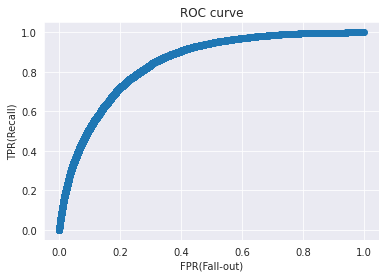

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)');

In [ ]:
import numpy as np
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('idx:', optimal_idx, ', threshold:', optimal_threshold)

idx: 8769 , threshold: 0.0822831550522726


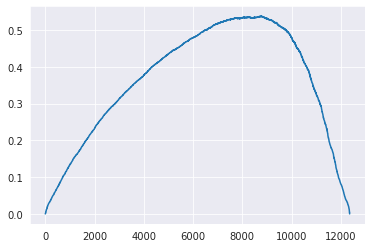

In [ ]:
plt.plot(tpr-fpr);

In [ ]:
y_pred_optimal = y_pred_proba >= optimal_threshold
print(classification_report(y_test, y_pred_optimal))

              precision    recall  f1-score   support

         0.0       0.98      0.69      0.81     69369
         1.0       0.22      0.85      0.35      7144

    accuracy                           0.71     76513
   macro avg       0.60      0.77      0.58     76513
weighted avg       0.91      0.71      0.77     76513



In [ ]:
auc_score = roc_auc_score(y_test, y_pred_optimal)
auc_score

0.7687552352620567

In [119]:
idux = pd.DataFrame({'model':['randomforest', 'xgbboost'],
                             'auc score':[0.74, 0.76],
                             'recall':[0.81, 0.83],
                            'accuracy':[0.937, 0.945]})
idux

,model,auc score,recall,accuracy
0,randomforest,0.74,0.81,0.937
1,xgbboost,0.76,0.83,0.945


Text(0.5, 1.0, 'accuracy')

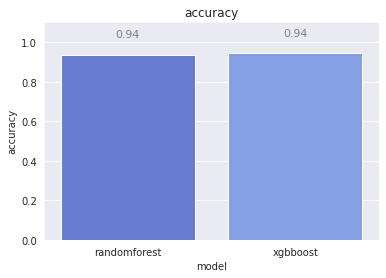

In [122]:
palette = sns.color_palette('coolwarm', 10)
g = sns.barplot(x = idux['model'], y = idux['accuracy'], palette=palette)
ax=g
#annotate axis = seaborn axis
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
_ = g.set_ylim(0,1.1)
g.set_title("accuracy")

In [90]:
!pip install eli5

     |████████████████████████████████| 106 kB 28.6 MB/s 


In [96]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    model2, # model
    scoring='accuracy', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)


# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val_processed, y_val_undersample);

In [94]:
import numpy as np

feature_names = X_test.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

HighBP              -0.002556
DiffWalk            -0.001038
OrangeVege          -0.000850
GreenVege           -0.000821
HighChol            -0.000549
Fruits              -0.000426
Education           -0.000355
Income              -0.000322
Diabetes            -0.000280
Checkcare           -0.000274
Depression          -0.000259
Smoker              -0.000183
CholCheck           -0.000170
Asthma              -0.000139
MentHlth            -0.000133
BMI                 -0.000034
AnyHealthcare       -0.000013
Exercise             0.000000
NoDocbcCost          0.000021
Veggies              0.000052
PhysHlth             0.000167
PhysActivity         0.000392
Age                  0.000450
HvyAlcoholConsump    0.000536
Stroke               0.001077
GenHlth              0.003892
Sex                  0.005055
dtype: float64

In [97]:
# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.0238 ± 0.0008,Sex
0.0220 ± 0.0009,Stroke
0.0200 ± 0.0004,HighChol
0.0152 ± 0.0009,Age
0.0149 ± 0.0008,HighBP
0.0133 ± 0.0006,Smoker
0.0128 ± 0.0007,GenHlth
0.0107 ± 0.0003,Fruits
0.0076 ± 0.0002,GreenVege
0.0066 ± 0.0008,Education


In [ ]:
X_train_undersample

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Checkcare,Depression,GreenVege,OrangeVege,Exercise,Asthma
157610,0.000000,0.000000,1.0,20.000000,1.000000,0.0,0.0,1.000000,0.000000,1.000000,0.0,1.0,1.000000,2.000000,0.0,0.0,0.0,0.0,4.000000,4.000000,8.000000,1.0,1.0,0.0,0.000000,1.000000,0.0
112762,1.000000,1.000000,1.0,35.000000,0.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.0,0.000000,2.000000,0.0,0.0,0.0,1.0,9.000000,6.000000,8.000000,1.0,0.0,1.0,1.000000,1.000000,0.0
78938,1.000000,0.000000,1.0,18.000000,0.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.0,0.000000,3.000000,0.0,0.0,0.0,0.0,9.000000,5.000000,7.000000,1.0,0.0,1.0,1.000000,1.000000,1.0
126056,1.000000,0.000000,1.0,42.000000,0.000000,0.0,2.0,1.000000,1.000000,1.000000,0.0,1.0,1.000000,3.000000,0.0,0.0,0.0,0.0,8.000000,6.000000,8.000000,1.0,1.0,1.0,1.000000,1.000000,0.0
316852,0.238787,1.000000,1.0,17.761213,1.000000,0.0,0.0,0.761213,0.761213,0.238787,0.0,1.0,0.761213,3.522425,0.0,15.0,1.0,0.0,8.477575,2.477575,1.238787,1.0,0.0,1.0,1.000000,0.761213,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33867,0.000000,0.000000,1.0,31.000000,0.000000,0.0,0.0,1.000000,0.000000,1.000000,0.0,0.0,0.000000,1.000000,0.0,7.0,0.0,1.0,2.000000,6.000000,2.000000,4.0,0.0,1.0,0.000000,1.000000,0.0
84434,1.000000,0.000000,1.0,27.000000,1.000000,0.0,0.0,1.000000,0.000000,0.000000,0.0,1.0,0.000000,2.000000,0.0,0.0,0.0,1.0,11.000000,4.000000,4.000000,4.0,0.0,0.0,0.000000,1.000000,0.0
95816,0.000000,0.000000,1.0,17.000000,0.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.0,0.000000,3.000000,2.0,14.0,1.0,0.0,6.000000,5.000000,4.000000,1.0,1.0,0.0,1.000000,1.000000,0.0
203245,1.000000,0.543316,1.0,36.000000,0.543316,0.0,2.0,1.000000,0.456684,1.000000,0.0,1.0,0.543316,5.000000,30.0,30.0,1.0,0.0,6.456684,4.456684,3.913368,1.0,1.0,1.0,0.456684,1.000000,1.0


In [ ]:
X_val_processed

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Checkcare,Depression,GreenVege,OrangeVege,Exercise,Asthma
108598,1.0,1.0,1.0,27.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.0,1.0,0.0,3.000000,0.0,0.000000,0.0,0.0,12.000000,4.000000,5.000000,1.000000,0.000000,1.000000,1.000000,0.0,1.000000
301599,1.0,1.0,1.0,27.002155,1.000000,0.0,2.0,0.0,0.997845,1.000000,0.0,1.0,0.0,4.997845,0.0,0.000000,1.0,0.0,10.997845,3.002155,2.997845,1.000000,0.002155,0.000000,0.000000,0.0,1.000000
170263,1.0,0.0,1.0,30.000000,0.000000,0.0,0.0,1.0,1.000000,1.000000,0.0,1.0,1.0,2.000000,0.0,10.000000,0.0,0.0,10.000000,3.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.0,1.000000
202186,1.0,1.0,1.0,29.000000,0.000000,0.0,0.0,1.0,0.069949,0.930051,0.0,1.0,0.0,2.000000,0.0,0.000000,0.0,1.0,6.930051,6.000000,7.069949,1.000000,0.000000,0.000000,0.000000,1.0,0.000000
297718,1.0,1.0,1.0,33.000000,1.000000,0.0,2.0,0.0,0.000000,0.765132,0.0,1.0,0.0,3.000000,0.0,4.234868,1.0,1.0,10.000000,5.765132,7.234868,1.234868,0.000000,1.000000,0.765132,0.0,0.234868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114241,0.0,0.0,1.0,23.000000,0.000000,0.0,0.0,1.0,1.000000,1.000000,0.0,1.0,0.0,1.000000,4.0,0.000000,0.0,0.0,11.000000,4.000000,3.000000,2.000000,0.000000,1.000000,1.000000,1.0,0.000000
72856,1.0,1.0,1.0,26.000000,0.000000,0.0,0.0,1.0,1.000000,1.000000,0.0,1.0,0.0,1.000000,0.0,0.000000,0.0,1.0,8.000000,5.000000,8.000000,1.000000,1.000000,1.000000,0.000000,1.0,0.000000
79423,1.0,0.0,1.0,25.000000,0.000000,0.0,0.0,1.0,0.000000,1.000000,0.0,1.0,0.0,1.000000,0.0,0.000000,0.0,1.0,8.000000,6.000000,8.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000
269684,1.0,0.0,1.0,30.000000,0.670604,0.0,2.0,1.0,1.000000,1.000000,0.0,1.0,0.0,3.000000,0.0,0.000000,0.0,1.0,10.000000,6.000000,8.000000,1.000000,0.000000,0.329396,0.329396,1.0,0.000000


In [ ]:
X_test_processed

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Checkcare,Depression,GreenVege,OrangeVege,Exercise,Asthma
76585,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,4.0,5.0,1.0,0.0,1.0,1.0,1.0,0.0
234694,0.0,0.0,1.0,29.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,6.0,1.0,0.0,1.0,0.0,1.0,0.0
197085,0.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,10.0,0.0,0.0,0.0,1.0,4.0,8.0,4.0,0.0,0.0,1.0,0.0,1.0
206599,1.0,1.0,1.0,43.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,6.0,5.0,5.0,2.0,0.0,1.0,1.0,1.0,1.0
30667,0.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,16.0,0.0,0.0,5.0,6.0,7.0,2.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93014,0.0,0.0,2.0,28.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,3.0,0.0,0.0,0.0,3.0,6.0,8.0,1.0,0.0,0.0,1.0,1.0,0.0
167868,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0,1.0,0.0,0.0,0.0,1.0,0.0
123433,1.0,1.0,1.0,33.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,12.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0
80500,1.0,1.0,1.0,24.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,20.0,20.0,0.0,0.0,11.0,4.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0


In [124]:
!pip install pdpbox

     |████████████████████████████████| 34.0 MB 43 kB/s 
     |████████████████████████████████| 13.1 MB 47.3 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758225 sha256=e851f89af979afeaf515635ba7bf090cf2fdc879cdb57f36c024661fa7bd3151
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


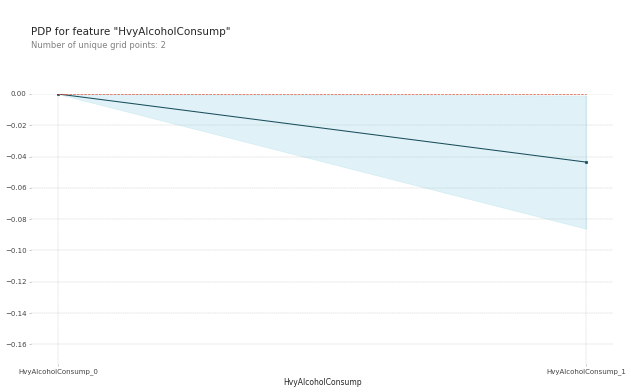

In [153]:
import matplotlib.pyplot as plt
from pdpbox import pdp
from pdpbox.pdp import pdp_isolate, pdp_plot
from sklearn.metrics import r2_score

feature = 'HvyAlcoholConsump'
isolated  = pdp_isolate(model=model2, dataset=X_test_processed, model_features=X_test_processed.columns, feature=feature)
pdp_plot(isolated , feature_name= feature); # 인코딩된 sex 값을 확인할 수 있습니다

In [126]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 50

In [127]:
!pip install shap

     |████████████████████████████████| 371 kB 25.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509236 sha256=c8e7a201ea4239b76b418ad737ea3a3ed3455dae9b27121838576ced46def834
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [128]:
import shap

explainer = shap.TreeExplainer(model2)
shap_values = explainer.shap_values(X_test_processed.iloc[:100])

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test_processed.iloc[:100])

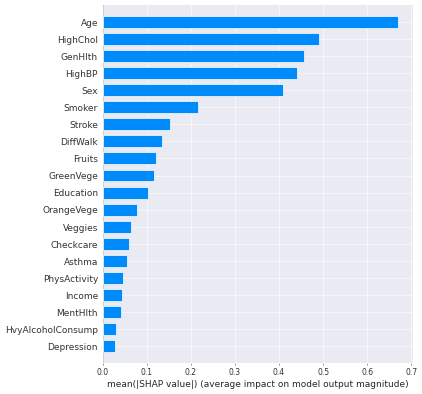

In [150]:
shap.summary_plot(shap_values, X_test_processed.iloc[:500], plot_type="bar")

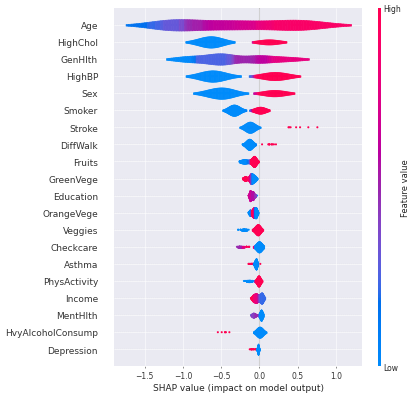

In [130]:
shap.summary_plot(shap_values, X_test_processed.iloc[:100], plot_type="violin")

In [149]:
X_test_processed.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Checkcare,Depression,GreenVege,OrangeVege,Exercise,Asthma
76585,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,4.0,5.0,1.0,0.0,1.0,1.0,1.0,0.0
234694,0.0,0.0,1.0,29.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,6.0,1.0,0.0,1.0,0.0,1.0,0.0
197085,0.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,10.0,0.0,0.0,0.0,1.0,4.0,8.0,4.0,0.0,0.0,1.0,0.0,1.0
206599,1.0,1.0,1.0,43.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,6.0,5.0,5.0,2.0,0.0,1.0,1.0,1.0,1.0
30667,0.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,16.0,0.0,0.0,5.0,6.0,7.0,2.0,1.0,1.0,1.0,0.0,1.0
